# Preparation

In [ ]:
!pip install d2l

In [ ]:
!pip install matplotlib==3.1.3

In [ ]:
!pip install pandas==1.1.5

# Optimization & deep learning

Goal of optimization

In [5]:
%matplotlib inline
import numpy as np
import torch
from mpl_toolkits import mplot3d
from d2l import torch as d2l

In [6]:
def f(x):
    return x * torch.cos(np.pi * x)

def g(x):
    return f(x) + 0.2 * torch.cos(5 * np.pi * x)

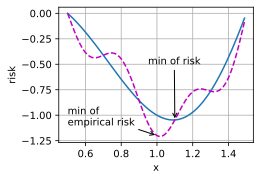

In [8]:
def annotate(text, xy, xytext):  
    d2l.plt.gca().annotate(text, xy=xy, xytext=xytext,
                           arrowprops=dict(arrowstyle='->'))

x = torch.arange(0.5, 1.5, 0.01)
d2l.set_figsize((4.5, 2.5))
d2l.plot(x, [f(x), g(x)], 'x', 'risk')
annotate('min of\nempirical risk', (1.0, -1.2), (0.5, -1.1))
annotate('min of risk', (1.1, -1.05), (0.95, -0.5))

Optimization challenges in deep learning

In deep learning, most objective functions are complicated and do not have analytical solutions. Instead, we must use numerical optimization algorithm. 

Local minima

One of the beneficcial properties of minibatch stochastic gradient descent where the netural variation of gradients over minibatches is able to dislodge the parameters from local minima

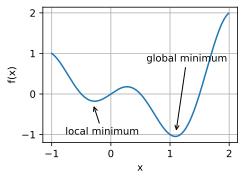

In [10]:
x = torch.arange(-1.0, 2.0, 0.01)
d2l.plot(x, [f(x), ], 'x', 'f(x)')
annotate('local minimum', (-0.3, -0.25), (-0.77, -1.0))
annotate('global minimum', (1.1, -0.95), (0.6, 0.8))

Saddle points

A reason for gradients to vanish. 

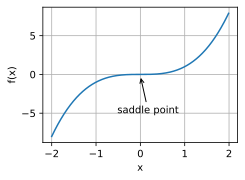

In [11]:
x = torch.arange(-2.0, 2.0, 0.01)
d2l.plot(x, [x**3], 'x', 'f(x)')
annotate('saddle point', (0, -0.2), (-0.52, -5.0))

/usr/local/lib/python3.7/dist-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Text(0.5, 0, 'y')

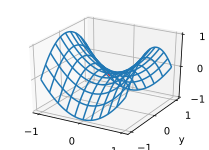

In [12]:
x, y = torch.meshgrid(
    torch.linspace(-1.0, 1.0, 101), torch.linspace(-1.0, 1.0, 101))
z = x**2 - y**2

ax = d2l.plt.figure().add_subplot(111, projection='3d')
ax.plot_wireframe(x, y, z, **{'rstride': 10, 'cstride': 10})
ax.plot([0], [0], [0], 'rx')
ticks = [-1, 0, 1]
d2l.plt.xticks(ticks)
d2l.plt.yticks(ticks)
ax.set_zticks(ticks)
d2l.plt.xlabel('x')
d2l.plt.ylabel('y')

Vanishing gradients

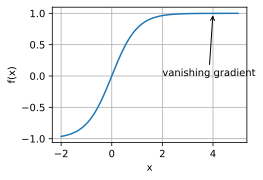

In [13]:
x = torch.arange(-2.0, 5.0, 0.01)
d2l.plot(x, [torch.tanh(x)], 'x', 'f(x)')
annotate('vanishing gradient', (4, 1), (2, 0.0))

# Convexity

In [14]:
%matplotlib inline
import numpy as np
import torch
from mpl_toolkits import mplot3d
from d2l import torch as d2l

Convex functions

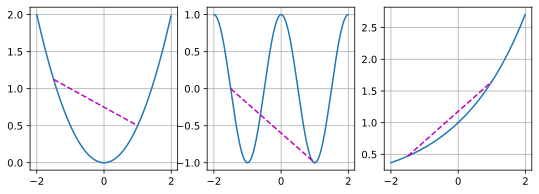

In [15]:
f = lambda x: 0.5 * x**2  # Convex
g = lambda x: torch.cos(np.pi * x)  # Nonconvex
h = lambda x: torch.exp(0.5 * x)  # Convex

x, segment = torch.arange(-2, 2, 0.01), torch.tensor([-1.5, 1])
d2l.use_svg_display()
_, axes = d2l.plt.subplots(1, 3, figsize=(9, 3))
for ax, func in zip(axes, [f, g, h]):
    d2l.plot([x, segment], [func(x), func(segment)], axes=ax)

Some properties of convex functions
- Local minima are global minima
- Below sets of convex functions are convex
- Whenever the second derivative of a function exists, it is easy to check whether f is convex
- Constraints can be handled efficiently
- Lagrangian
- Penalties
- Projections

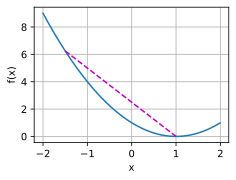

In [17]:
f = lambda x: (x - 1) ** 2
d2l.set_figsize()
d2l.plot([x, segment], [f(x), f(segment)], 'x', 'f(x)')

**Summary:**
- Intersections of convex sets are convex. Unions are not.
- The expectation of a convex function is no less than the convex function of an expectation (Jensen's inequality)
- A twice-differentiable function is convex if and only if its Hessian (matrix of second derivatives) is positive semidefinite
- Convex constraints can be added via the Lagrandian. In practice, we may simply add them with a penalty to the objective function
- Projections map to points in the convex set closest to the original points.

# Gradient Descent


## One-dimensional gradient descent


In [18]:
%matplotlib inline
import numpy as np
import torch
from d2l import torch as d2l

def f(x):  # Objective function
    return x ** 2

def f_grad(x):  # Gradient (derivative) of the objective function
    return 2 * x

In [19]:
def gd(eta, f_grad):
    x = 10.0
    results = [x]
    for i in range(10):
        x -= eta * f_grad(x)
        results.append(float(x))
    print(f'epoch 10, x: {x:f}')
    return results

results = gd(0.2, f_grad)

epoch 10, x: 0.060466


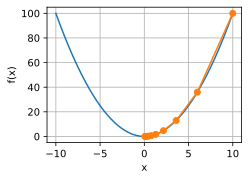

In [20]:
def show_trace(results, f):
    n = max(abs(min(results)), abs(max(results)))
    f_line = torch.arange(-n, n, 0.01)
    d2l.set_figsize()
    d2l.plot([f_line, results], [[f(x) for x in f_line], [
        f(x) for x in results]], 'x', 'f(x)', fmts=['-', '-o'])

show_trace(results, f)

Learning rate

too small

epoch 10, x: 3.486784


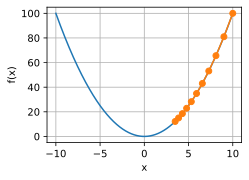

In [22]:
show_trace(gd(0.05, f_grad), f)

too large

epoch 10, x: 61.917364


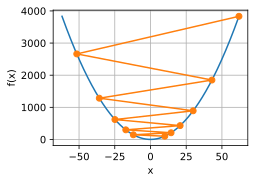

In [23]:
show_trace(gd(1.1, f_grad), f)

Local minima

epoch 10, x: -1.528166


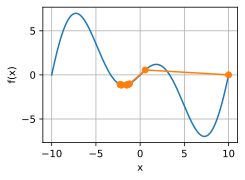

In [24]:
c = torch.tensor(0.15 * np.pi)

def f(x):  # Objective function
    return x * torch.cos(c * x)

def f_grad(x):  # Gradient of the objective function
    return torch.cos(c * x) - c * x * torch.sin(c * x)

show_trace(gd(2, f_grad), f)

## Multivariate gradient descent

In [27]:
def train_2d(trainer, steps=20, f_grad=None): 
    """Optimize a 2D objective function with a customized trainer."""
    # `s1` and `s2` are internal state variables that will be used later
    x1, x2, s1, s2 = -5, -2, 0, 0
    results = [(x1, x2)]
    for i in range(steps):
        if f_grad:
            x1, x2, s1, s2 = trainer(x1, x2, s1, s2, f_grad)
        else:
            x1, x2, s1, s2 = trainer(x1, x2, s1, s2)
        results.append((x1, x2))
    print(f'epoch {i + 1}, x1: {float(x1):f}, x2: {float(x2):f}')
    return results

def show_trace_2d(f, results): 
    """Show the trace of 2D variables during optimization."""
    d2l.set_figsize()
    d2l.plt.plot(*zip(*results), '-o', color='#ff7f0e')
    x1, x2 = torch.meshgrid(torch.arange(-5.5, 1.0, 0.1),
                          torch.arange(-3.0, 1.0, 0.1))
    d2l.plt.contour(x1, x2, f(x1, x2), colors='#1f77b4')
    d2l.plt.xlabel('x1')
    d2l.plt.ylabel('x2')

epoch 20, x1: -0.057646, x2: -0.000073


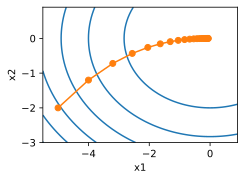

In [28]:
def f_2d(x1, x2):  # Objective function
    return x1 ** 2 + 2 * x2 ** 2

def f_2d_grad(x1, x2):  # Gradient of the objective function
    return (2 * x1, 4 * x2)

def gd_2d(x1, x2, s1, s2, f_grad):
    g1, g2 = f_grad(x1, x2)
    return (x1 - eta * g1, x2 - eta * g2, 0, 0)

eta = 0.1
show_trace_2d(f_2d, train_2d(gd_2d, f_grad=f_2d_grad))

Adaptive methods

Some help determining learning rate

Newton's method

epoch 10, x: tensor(0.)


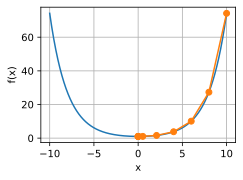

In [29]:
c = torch.tensor(0.5)

def f(x):  # Objective function
    return torch.cosh(c * x)

def f_grad(x):  # Gradient of the objective function
    return c * torch.sinh(c * x)

def f_hess(x):  # Hessian of the objective function
    return c**2 * torch.cosh(c * x)

def newton(eta=1):
    x = 10.0
    results = [x]
    for i in range(10):
        x -= eta * f_grad(x) / f_hess(x)
        results.append(float(x))
    print('epoch 10, x:', x)
    return results

show_trace(newton(), f)

epoch 10, x: tensor(26.8341)


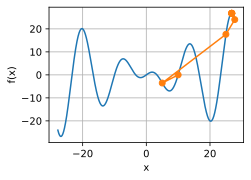

In [30]:
c = torch.tensor(0.15 * np.pi)

def f(x):  # Objective function
    return x * torch.cos(c * x)

def f_grad(x):  # Gradient of the objective function
    return torch.cos(c * x) - c * x * torch.sin(c * x)

def f_hess(x):  # Hessian of the objective function
    return - 2 * c * torch.sin(c * x) - x * c**2 * torch.cos(c * x)

show_trace(newton(), f)

epoch 10, x: tensor(7.2699)


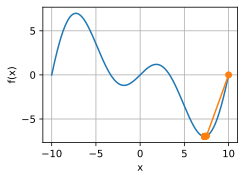

In [31]:
show_trace(newton(0.5), f)

**Summary:**
- Learning rates matter. Too large and we diverge, too small and we do not make progress.
- Gradient descent can get stuck in local minima.
- In high dimensions adjusting the learning rate is complicated.
- Preconditioning can help with scale adjustment.
- Newton's method is a lot faster once it has started working properly in convex problems.
- Beware of using Newton's method without any adjustments for nonconvex problems.

# Stochastic Gradient Descent

Much more noisy than the one we observed in gradient descent.

In [32]:
%matplotlib inline
import math
import torch
from d2l import torch as d2l

epoch 50, x1: -0.008999, x2: -0.168572


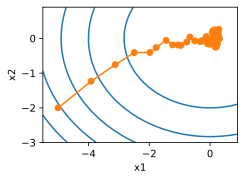

In [33]:
def f(x1, x2):  # Objective function
    return x1 ** 2 + 2 * x2 ** 2

def f_grad(x1, x2):  # Gradient of the objective function
    return 2 * x1, 4 * x2

def sgd(x1, x2, s1, s2, f_grad):
    g1, g2 = f_grad(x1, x2)
    # Simulate noisy gradient
    g1 += torch.normal(0.0, 1, (1,))
    g2 += torch.normal(0.0, 1, (1,))
    eta_t = eta * lr()
    return (x1 - eta_t * g1, x2 - eta_t * g2, 0, 0)

def constant_lr():
    return 1

eta = 0.1
lr = constant_lr  # Constant learning rate
d2l.show_trace_2d(f, d2l.train_2d(sgd, steps=50, f_grad=f_grad))

Dynamic learning rate

epoch 1000, x1: -0.839086, x2: -0.043242


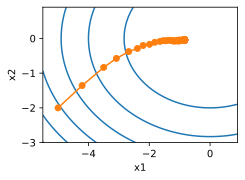

In [35]:
# exponential decrease
def exponential_lr():
    # Global variable that is defined outside this function and updated inside
    global t
    t += 1
    return math.exp(-0.1 * t)

t = 1
lr = exponential_lr
d2l.show_trace_2d(f, d2l.train_2d(sgd, steps=1000, f_grad=f_grad))

epoch 50, x1: -0.057756, x2: 0.024813


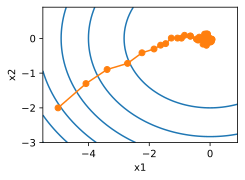

In [37]:
# polynomial decay
def polynomial_lr():
    # Global variable that is defined outside this function and updated inside
    global t
    t += 1
    return (1 + 0.1 * t) ** (-0.5)

t = 1
lr = polynomial_lr
d2l.show_trace_2d(f, d2l.train_2d(sgd, steps=50, f_grad=f_grad))

**Summary:**
- For convex problems we prove that for a wide choice of learning rates stochastic gradient descent will converge to the optimal solution.
- For deep learning this is generally not the case. However, the analysis of convex problems gives us useful insight into how to approach optimization, namely to reduce the learning rate progressively, albeit not too quickly.
- Problems occur when the learning rate is too small or too large. In practive a suitable learning rate is often found only after multiple experiments.
- When there are more examples in the training dataset, it costs more to comepute each iteration for gradient descent, so stochastic gradient descent is preferred in these cases.
- Optimality guarantees for stochastic gradient descent are in general not available in nonconvex cases since the number of local minima that require checking might be exponential.

# Minibatches stochastic gradient descent

Gradient descent is not *data efficient* whenever data is very similar. Stochastic gradient descent is not *computationally efficient* whenever data is very similar.

In [38]:
%matplotlib inline
import numpy as np
import torch
from torch import nn
from d2l import torch as d2l

timer = d2l.Timer()
A = torch.zeros(256, 256)
B = torch.randn(256, 256)
C = torch.randn(256, 256)

Element-wise assignment

In [40]:
# Compute A = BC one element at a time
timer.start()
for i in range(256):
    for j in range(256):
        A[i, j] = torch.dot(B[i, :], C[:, j])
timer.stop()

0.8797545433044434

Column-wise assignment

In [41]:
# Compute A = BC one column at a time
timer.start()
for j in range(256):
    A[:, j] = torch.mv(B, C[:, j])
timer.stop()

0.026584148406982422

Entire operation in one block

In [42]:
# Compute A = BC in one go
timer.start()
A = torch.mm(B, C)
timer.stop()

# Multiply and add count as separate operations (fused in practice)
gigaflops = [2/i for i in timer.times]
print(f'performance in Gigaflops: element {gigaflops[0]:.3f}, '
      f'column {gigaflops[1]:.3f}, full {gigaflops[2]:.3f}')

performance in Gigaflops: element 1.875, column 2.273, full 75.233


Minibatches

Computation on the minibatch is essentially as efficient as on the full matrix. A word of caution is in order.

In [43]:
timer.start()
for j in range(0, 256, 64):
    A[:, j:j+64] = torch.mm(B, C[:, j:j+64])
timer.stop()
print(f'performance in Gigaflops: block {2 / timer.times[3]:.3f}')

performance in Gigaflops: block 49.638


Reading the dataset

Generating minibatches from data

In [45]:
d2l.DATA_HUB['airfoil'] = (d2l.DATA_URL + 'airfoil_self_noise.dat',
                           '76e5be1548fd8222e5074cf0faae75edff8cf93f')

def get_data_ch11(batch_size=10, n=1500):
    data = np.genfromtxt(d2l.download('airfoil'),
                         dtype=np.float32, delimiter='\t')
    data = torch.from_numpy((data - data.mean(axis=0)) / data.std(axis=0))
    data_iter = d2l.load_array((data[:n, :-1], data[:n, -1]),
                               batch_size, is_train=True)
    return data_iter, data.shape[1]-1

Implementation from scratch

In [46]:
def sgd(params, states, hyperparams):
    for p in params:
        p.data.sub_(hyperparams['lr'] * p.grad)
        p.grad.data.zero_()

In [47]:
def train_ch11(trainer_fn, states, hyperparams, data_iter,
               feature_dim, num_epochs=2):
    # Initialization
    w = torch.normal(mean=0.0, std=0.01, size=(feature_dim, 1),
                     requires_grad=True)
    b = torch.zeros((1), requires_grad=True)
    net, loss = lambda X: d2l.linreg(X, w, b), d2l.squared_loss
    # Train
    animator = d2l.Animator(xlabel='epoch', ylabel='loss',
                            xlim=[0, num_epochs], ylim=[0.22, 0.35])
    n, timer = 0, d2l.Timer()
    for _ in range(num_epochs):
        for X, y in data_iter:
            l = loss(net(X), y).mean()
            l.backward()
            trainer_fn([w, b], states, hyperparams)
            n += X.shape[0]
            if n % 200 == 0:
                timer.stop()
                animator.add(n/X.shape[0]/len(data_iter),
                             (d2l.evaluate_loss(net, data_iter, loss),))
                timer.start()
    print(f'loss: {animator.Y[0][-1]:.3f}, {timer.avg():.3f} sec/epoch')
    return timer.cumsum(), animator.Y[0]

In [51]:
def train_sgd(lr, batch_size, num_epochs=2):
    data_iter, feature_dim = get_data_ch11(batch_size)
    return train_ch11(
        sgd, None, {'lr': lr}, data_iter, feature_dim, num_epochs)

loss: 0.249, 0.046 sec/epoch


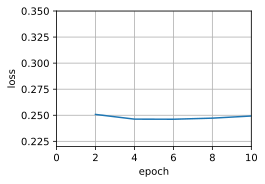

In [54]:
gd_res = train_sgd(1, 1500, 10)

loss: 0.244, 0.061 sec/epoch


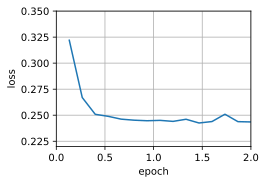

In [55]:
sgd_res = train_sgd(0.005, 1)

loss: 0.246, 0.005 sec/epoch


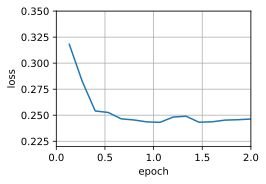

In [56]:
mini1_res = train_sgd(.4, 100)

loss: 0.248, 0.013 sec/epoch


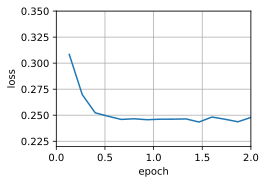

In [57]:
mini2_res = train_sgd(.05, 10)

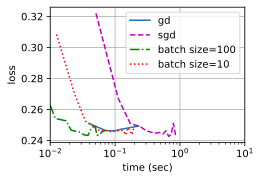

In [58]:
d2l.set_figsize([6, 3])
d2l.plot(*list(map(list, zip(gd_res, sgd_res, mini1_res, mini2_res))),
         'time (sec)', 'loss', xlim=[1e-2, 10],
         legend=['gd', 'sgd', 'batch size=100', 'batch size=10'])
d2l.plt.gca().set_xscale('log')

Concise implementation

In [59]:
def train_concise_ch11(trainer_fn, hyperparams, data_iter, num_epochs=4):
    # Initialization
    net = nn.Sequential(nn.Linear(5, 1))
    def init_weights(m):
        if type(m) == nn.Linear:
            torch.nn.init.normal_(m.weight, std=0.01)
    net.apply(init_weights)

    optimizer = trainer_fn(net.parameters(), **hyperparams)

    # Note: `MSELoss` computes squared error without the 1/2 factor
    loss = nn.MSELoss(reduction='none')
    animator = d2l.Animator(xlabel='epoch', ylabel='loss',
                            xlim=[0, num_epochs], ylim=[0.22, 0.35])
    n, timer = 0, d2l.Timer()
    for _ in range(num_epochs):
        for X, y in data_iter:
            optimizer.zero_grad()
            out = net(X)
            y = y.reshape(out.shape)
            l = loss(out, y)
            l.mean().backward()
            optimizer.step()
            n += X.shape[0]
            if n % 200 == 0:
                timer.stop()
                animator.add(n/X.shape[0]/len(data_iter),
                             (d2l.evaluate_loss(net, data_iter, loss),))
                timer.start()
    print(f'loss: {animator.Y[0][-1]:.3f}, {timer.avg():.3f} sec/epoch')

loss: 0.489, 0.014 sec/epoch


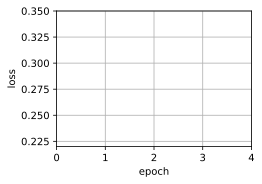

In [60]:
data_iter, _ = get_data_ch11(10)
trainer = torch.optim.SGD
train_concise_ch11(trainer, {'lr': 0.05}, data_iter)

**Summary:**
- Vectorization makes code more efficient due to reduced overheead arising from the deep learning framework and due to better momery locality and caching on CPUs and GPUs
- There is a trade-off between statistical efficiency arising from stochastic gradient descent and ccomputational efficiency arising from processing large batches of data at a time
- Minibatch stochastic gradient descent offers the best of both worlds: computational and statistical efficiency
- In minibatch stochastic gradient descent we process batches of data obtained by a random permutation of the training data (ie. each observation is processed only once per epoch, albeit in random order)
- It is advisable to decay the learning rates during training
- In general, minibatch stochastic gradient descent is faster than stochastic gradient descent and gradient descent for convergence to a smaller risk, when measured in terms of clock time

# Momentum

The requirement for learning rates may be different for different dimensions.

epoch 20, x1: 0.007188, x2: 0.002553


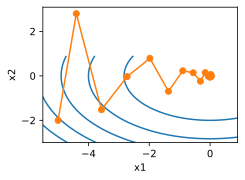

In [63]:
def momentum_2d(x1, x2, v1, v2):
    v1 = beta * v1 + 0.2 * x1
    v2 = beta * v2 + 4 * x2
    return x1 - eta * v1, x2 - eta * v2, v1, v2

eta, beta = 0.6, 0.5
d2l.show_trace_2d(f_2d, d2l.train_2d(momentum_2d))

epoch 20, x1: -0.126340, x2: -0.186632


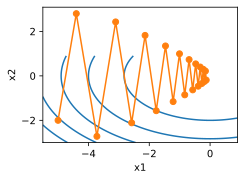

In [64]:
eta, beta = 0.6, 0.25
d2l.show_trace_2d(f_2d, d2l.train_2d(momentum_2d))

Effective sample weight

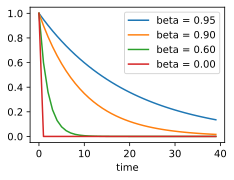

In [66]:
d2l.set_figsize()
betas = [0.95, 0.9, 0.6, 0]
for beta in betas:
    x = torch.arange(40).detach().numpy()
    d2l.plt.plot(x, beta ** x, label=f'beta = {beta:.2f}')
d2l.plt.xlabel('time')
d2l.plt.legend()

Practical experiments

Implementation from scratch

In [67]:
def init_momentum_states(feature_dim):
    v_w = torch.zeros((feature_dim, 1))
    v_b = torch.zeros(1)
    return (v_w, v_b)

def sgd_momentum(params, states, hyperparams):
    for p, v in zip(params, states):
        with torch.no_grad():
            v[:] = hyperparams['momentum'] * v + p.grad
            p[:] -= hyperparams['lr'] * v
        p.grad.data.zero_()

loss: 0.242, 0.016 sec/epoch


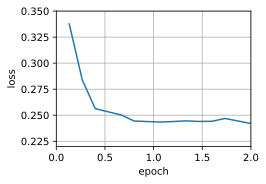

In [68]:
def train_momentum(lr, momentum, num_epochs=2):
    d2l.train_ch11(sgd_momentum, init_momentum_states(feature_dim),
                   {'lr': lr, 'momentum': momentum}, data_iter,
                   feature_dim, num_epochs)

data_iter, feature_dim = d2l.get_data_ch11(batch_size=10)
train_momentum(0.02, 0.5)

loss: 0.247, 0.014 sec/epoch


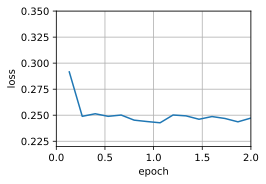

In [69]:
train_momentum(0.01, 0.9)

loss: 0.242, 0.022 sec/epoch


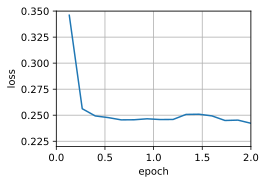

In [70]:
train_momentum(0.005, 0.9)

Concise implementation

loss: 0.496, 0.015 sec/epoch


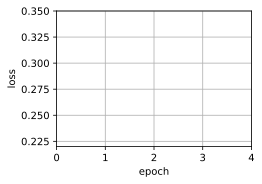

In [71]:
trainer = torch.optim.SGD
d2l.train_concise_ch11(trainer, {'lr': 0.005, 'momentum': 0.9}, data_iter)

**Summary:**
- Momentum replaces gradients with a leaky average over past gradients. This accelerates convergence significantly
- It is desirable for both noise-free gradient descent and (noisy) stochastic gradient descent
- Momentum prevents stalling of the optimization process that is much more likely to occur for stochastic gradient descent
- The effective number of gradients is given by 1/1-beta due to exponential downweighting of past data
- In the case of convex quadratic problems this can be analyzed explicitly in detail
- Implementation is quite straight forward but it requires us to storee an additional state vector (momentum v)

# Adagrad

Consider learning problems with features that occur infrequently. Learning rate either decrease too slowly for frequent features or too quickly for infreqeunt ones. Adagrad addresses this problem by replacing the rather crude counter by an aggregate of the squares of prevously observed gradients. 

epoch 20, x1: -2.382563, x2: -0.158591


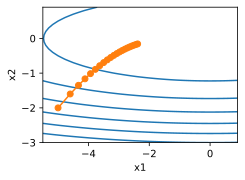

In [72]:
%matplotlib inline
import math
import torch
from d2l import torch as d2l

def adagrad_2d(x1, x2, s1, s2):
    eps = 1e-6
    g1, g2 = 0.2 * x1, 4 * x2
    s1 += g1 ** 2
    s2 += g2 ** 2
    x1 -= eta / math.sqrt(s1 + eps) * g1
    x2 -= eta / math.sqrt(s2 + eps) * g2
    return x1, x2, s1, s2

def f_2d(x1, x2):
    return 0.1 * x1 ** 2 + 2 * x2 ** 2

eta = 0.4
d2l.show_trace_2d(f_2d, d2l.train_2d(adagrad_2d))

epoch 20, x1: -0.002295, x2: -0.000000


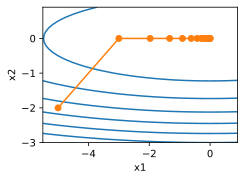

In [73]:
eta = 2
d2l.show_trace_2d(f_2d, d2l.train_2d(adagrad_2d))

Implementation from scratch

In [74]:
def init_adagrad_states(feature_dim):
    s_w = torch.zeros((feature_dim, 1))
    s_b = torch.zeros(1)
    return (s_w, s_b)

def adagrad(params, states, hyperparams):
    eps = 1e-6
    for p, s in zip(params, states):
        with torch.no_grad():
            s[:] += torch.square(p.grad)
            p[:] -= hyperparams['lr'] * p.grad / torch.sqrt(s + eps)
        p.grad.data.zero_()

loss: 0.243, 0.017 sec/epoch


([0.017109155654907227,
  0.028751134872436523,
  0.04628777503967285,
  0.0626075267791748,
  0.07845544815063477,
  0.09695029258728027,
  0.10966801643371582,
  0.12454533576965332,
  0.14199471473693848,
  0.15522050857543945,
  0.16971063613891602,
  0.18456006050109863,
  0.19872069358825684,
  0.2136516571044922,
  0.2575562000274658],
 [0.27415297909577685,
  0.25136874461174014,
  0.25338469568888344,
  0.24511279672384262,
  0.24555851272741955,
  0.24583819035689036,
  0.2430430980126063,
  0.24494997807343802,
  0.24548734680811565,
  0.24630113248030344,
  0.24318836232026417,
  0.24336356395483016,
  0.24390277606248856,
  0.24217165557543438,
  0.24349660056829453])

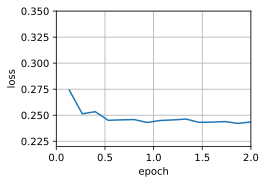

In [75]:
data_iter, feature_dim = d2l.get_data_ch11(batch_size=10)
d2l.train_ch11(adagrad, init_adagrad_states(feature_dim),
               {'lr': 0.1}, data_iter, feature_dim)

Concise implementation

loss: 0.484, 0.018 sec/epoch


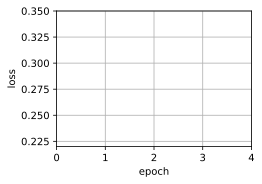

In [77]:
trainer = torch.optim.Adagrad
d2l.train_concise_ch11(trainer, {'lr': 0.1}, data_iter)

**Summary:**
- Adagrad decreases the learning rate dynamically on a per-coordinate basis
- It uses the magnitude of the gradient as a means of adjusting how quickly progress is achieved - coordinates with large gradients are compensated with smaller learning rate
- Computing the exact second derivative is typically infeasible in deep learning problems due to memory and computational constraints. The gradient can be a useful proxy
- If the optimization problem has a rather uneven structure Adagrad can help mitigate the distortion
- Adagrad is particularly effective for sparse features where the learning rate needs to decrease more slowly for infrequently occcuring terms
- On deep learning problems Adagrad can sometimes be too aggressive in reducing learning rates.

# RMSProp

In Adagrad, the learning rate decreases at a predefined schedule. While this is generally appropriate for convex problems, it might not be ideal for nonconvex ones. Yet the coordinate-wise adaptivity of Adagrad is highly desirable as a preconditioner.

Text(0.5, 0, 'time')

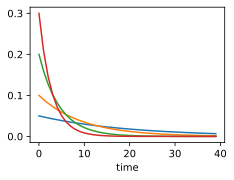

In [78]:
import math
import torch
from d2l import torch as d2l

d2l.set_figsize()
gammas = [0.95, 0.9, 0.8, 0.7]
for gamma in gammas:
    x = torch.arange(40).detach().numpy()
    d2l.plt.plot(x, (1-gamma) * gamma ** x, label=f'gamma = {gamma:.2f}')
d2l.plt.xlabel('time')

Implementation from scratch

epoch 20, x1: -0.010599, x2: 0.000000


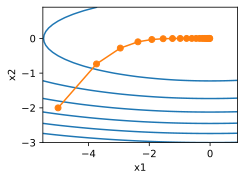

In [79]:
def rmsprop_2d(x1, x2, s1, s2):
    g1, g2, eps = 0.2 * x1, 4 * x2, 1e-6
    s1 = gamma * s1 + (1 - gamma) * g1 ** 2
    s2 = gamma * s2 + (1 - gamma) * g2 ** 2
    x1 -= eta / math.sqrt(s1 + eps) * g1
    x2 -= eta / math.sqrt(s2 + eps) * g2
    return x1, x2, s1, s2

def f_2d(x1, x2):
    return 0.1 * x1 ** 2 + 2 * x2 ** 2

eta, gamma = 0.4, 0.9
d2l.show_trace_2d(f_2d, d2l.train_2d(rmsprop_2d))

In [80]:
def init_rmsprop_states(feature_dim):
    s_w = torch.zeros((feature_dim, 1))
    s_b = torch.zeros(1)
    return (s_w, s_b)

def rmsprop(params, states, hyperparams):
    gamma, eps = hyperparams['gamma'], 1e-6
    for p, s in zip(params, states):
        with torch.no_grad():
            s[:] = gamma * s + (1 - gamma) * torch.square(p.grad)
            p[:] -= hyperparams['lr'] * p.grad / torch.sqrt(s + eps)
        p.grad.data.zero_()

loss: 0.243, 0.022 sec/epoch


([0.01862168312072754,
  0.08279681205749512,
  0.10299825668334961,
  0.13653302192687988,
  0.1699354648590088,
  0.18462276458740234,
  0.20166659355163574,
  0.21648669242858887,
  0.2324836254119873,
  0.24787402153015137,
  0.2633655071258545,
  0.2788732051849365,
  0.2947065830230713,
  0.3114147186279297,
  0.3266441822052002],
 [0.3508652551968892,
  0.2942094314098358,
  0.2623354339003563,
  0.25314070240656533,
  0.25065756688515345,
  0.24586737165848413,
  0.2436086198290189,
  0.24281052311261495,
  0.2437743763625622,
  0.24299870759248735,
  0.24749916315078735,
  0.24591308293739955,
  0.24339863459269206,
  0.24334273319443067,
  0.24256626425186792])

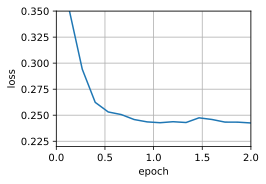

In [81]:
data_iter, feature_dim = d2l.get_data_ch11(batch_size=10)
d2l.train_ch11(rmsprop, init_rmsprop_states(feature_dim),
               {'lr': 0.01, 'gamma': 0.9}, data_iter, feature_dim)

Concise implementation

loss: 0.488, 0.019 sec/epoch


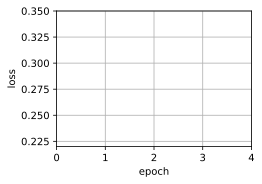

In [82]:
trainer = torch.optim.RMSprop
d2l.train_concise_ch11(trainer, {'lr': 0.01, 'alpha': 0.9},
                       data_iter)

**Summary:**
- RMSProp is very similar to Adagrad insofar as both use the square of the gradient to scale coefficients
- RMSProp shares with momentum the leaky averaging. However, RMSProp uses the technique to adjust the coefficieent-wise preconditioner
- The learning rate needs to be scheduled by the experimenter in practice
- The coefficient determines how long the history is when adjusting the per-coordinate scale

# Adadelta

Another variant of AdaGrad. 

Implementation

In [83]:
%matplotlib inline
import torch
from d2l import torch as d2l


def init_adadelta_states(feature_dim):
    s_w, s_b = torch.zeros((feature_dim, 1)), torch.zeros(1)
    delta_w, delta_b = torch.zeros((feature_dim, 1)), torch.zeros(1)
    return ((s_w, delta_w), (s_b, delta_b))

def adadelta(params, states, hyperparams):
    rho, eps = hyperparams['rho'], 1e-5
    for p, (s, delta) in zip(params, states):
        with torch.no_grad():
            # In-place updates via [:]
            s[:] = rho * s + (1 - rho) * torch.square(p.grad)
            g = (torch.sqrt(delta + eps) / torch.sqrt(s + eps)) * p.grad
            p[:] -= g
            delta[:] = rho * delta + (1 - rho) * g * g
        p.grad.data.zero_()

loss: 0.244, 0.023 sec/epoch


([0.012141227722167969,
  0.02957606315612793,
  0.04885673522949219,
  0.08064103126525879,
  0.09940123558044434,
  0.11822915077209473,
  0.15107488632202148,
  0.21799993515014648,
  0.23603034019470215,
  0.25388455390930176,
  0.2700936794281006,
  0.2873990535736084,
  0.30426025390625,
  0.3198201656341553,
  0.3413870334625244],
 [0.4057799784342448,
  0.33894322407245636,
  0.3016624459028244,
  0.27407487777868905,
  0.2609188219110171,
  0.2528666132291158,
  0.24697634661197662,
  0.24761771154403686,
  0.24467670142650605,
  0.2428240020275116,
  0.24503892119725545,
  0.24411109522978464,
  0.24364319376150767,
  0.24509257949392002,
  0.244358615954717])

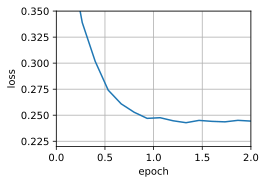

In [84]:
data_iter, feature_dim = d2l.get_data_ch11(batch_size=10)
d2l.train_ch11(adadelta, init_adadelta_states(feature_dim),
               {'rho': 0.9}, data_iter, feature_dim)

Concise implementation

loss: 0.487, 0.024 sec/epoch


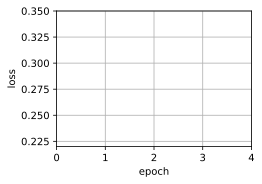

In [85]:
trainer = torch.optim.Adadelta
d2l.train_concise_ch11(trainer, {'rho': 0.9}, data_iter)

**Summary:**
- Adadelta has no learning rate parameter. Instead, it uses the rate of change in the parameters itself to adapt the learning rate
- Adadelta requires two state variables to store the second moments of gradient and the change in parameters
- Adadelta uses leaky averages to keep a running estimate of the appropriate statistics

# Adam

Combines all techniques

Implementation from scratch

In [86]:
%matplotlib inline
import torch
from d2l import torch as d2l


def init_adam_states(feature_dim):
    v_w, v_b = torch.zeros((feature_dim, 1)), torch.zeros(1)
    s_w, s_b = torch.zeros((feature_dim, 1)), torch.zeros(1)
    return ((v_w, s_w), (v_b, s_b))

def adam(params, states, hyperparams):
    beta1, beta2, eps = 0.9, 0.999, 1e-6
    for p, (v, s) in zip(params, states):
        with torch.no_grad():
            v[:] = beta1 * v + (1 - beta1) * p.grad
            s[:] = beta2 * s + (1 - beta2) * torch.square(p.grad)
            v_bias_corr = v / (1 - beta1 ** hyperparams['t'])
            s_bias_corr = s / (1 - beta2 ** hyperparams['t'])
            p[:] -= hyperparams['lr'] * v_bias_corr / (torch.sqrt(s_bias_corr)
                                                       + eps)
        p.grad.data.zero_()
    hyperparams['t'] += 1

loss: 0.244, 0.020 sec/epoch


([0.01967787742614746,
  0.04473233222961426,
  0.0691683292388916,
  0.09620070457458496,
  0.12189388275146484,
  0.14877891540527344,
  0.16643285751342773,
  0.1844794750213623,
  0.20068573951721191,
  0.2176647186279297,
  0.2349553108215332,
  0.25171780586242676,
  0.27054882049560547,
  0.28873682022094727,
  0.30597352981567383],
 [0.3879775691429774,
  0.3157045996983846,
  0.273399808883667,
  0.26037173386414847,
  0.25049657169977824,
  0.24807084810733795,
  0.2445233694712321,
  0.24668802114327748,
  0.24514079080025356,
  0.2429799635608991,
  0.24346234671274822,
  0.24329436643918356,
  0.24282299053668976,
  0.24565891818205515,
  0.24433504827817282])

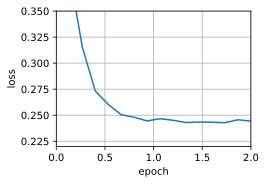

In [87]:
data_iter, feature_dim = d2l.get_data_ch11(batch_size=10)
d2l.train_ch11(adam, init_adam_states(feature_dim),
               {'lr': 0.01, 't': 1}, data_iter, feature_dim)

Concise implementation

loss: 0.494, 0.019 sec/epoch


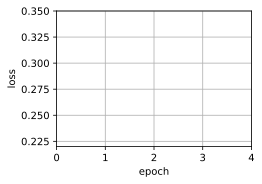

In [88]:
trainer = torch.optim.Adam
d2l.train_concise_ch11(trainer, {'lr': 0.01}, data_iter)

**Yogi**

One of the problems of Adam is that it can fail to converge even in convex settings when the second moment estimate in s_t blows up. 

loss: 0.243, 0.024 sec/epoch


([0.03653430938720703,
  0.05448126792907715,
  0.08173537254333496,
  0.11440873146057129,
  0.14402413368225098,
  0.17768454551696777,
  0.20758295059204102,
  0.23709869384765625,
  0.2540726661682129,
  0.27068042755126953,
  0.28851795196533203,
  0.30446600914001465,
  0.3227195739746094,
  0.33919572830200195,
  0.35608887672424316],
 [0.36187195996443433,
  0.2970573607683182,
  0.26264153053363165,
  0.25238859168688454,
  0.24776431262493134,
  0.24438647031784058,
  0.24486272545655569,
  0.24329709051052728,
  0.2431333489815394,
  0.24321443339188895,
  0.242237272977829,
  0.2448878653347492,
  0.24356509160995482,
  0.24572497497002282,
  0.24255031325419743])

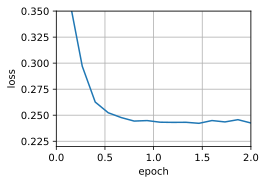

In [89]:
def yogi(params, states, hyperparams):
    beta1, beta2, eps = 0.9, 0.999, 1e-3
    for p, (v, s) in zip(params, states):
        with torch.no_grad():
            v[:] = beta1 * v + (1 - beta1) * p.grad
            s[:] = s + (1 - beta2) * torch.sign(
                torch.square(p.grad) - s) * torch.square(p.grad)
            v_bias_corr = v / (1 - beta1 ** hyperparams['t'])
            s_bias_corr = s / (1 - beta2 ** hyperparams['t'])
            p[:] -= hyperparams['lr'] * v_bias_corr / (torch.sqrt(s_bias_corr)
                                                       + eps)
        p.grad.data.zero_()
    hyperparams['t'] += 1

data_iter, feature_dim = d2l.get_data_ch11(batch_size=10)
d2l.train_ch11(yogi, init_adam_states(feature_dim),
               {'lr': 0.01, 't': 1}, data_iter, feature_dim)

**Summary:**
- Adam combines features of many optimization algorithms into a fairly robust update rule
- Created on the basis of RMSProp, Adam also uses EWMA on the minibatch stochastic gradient
- Adam uses bias correction to adjust for a slow startup when estimating momentum and a second moment
- For gradients with significant variance we may encounter issues with convergence. They can be amended by using larger minibatches or by switching to an improved estimate for s_t. Yogi offers such an alternative

# Learning rate scheduling

Toy problem: modern LeNet on Fashion-MNIST.

In [4]:
%matplotlib inline
import math
import torch
from torch import nn
from torch.optim import lr_scheduler
from d2l import torch as d2l


def net_fn():
    model = nn.Sequential(
        nn.Conv2d(1, 6, kernel_size=5, padding=2), nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.Conv2d(6, 16, kernel_size=5), nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.Flatten(),
        nn.Linear(16 * 5 * 5, 120), nn.ReLU(),
        nn.Linear(120, 84), nn.ReLU(),
        nn.Linear(84, 10))

    return model

loss = nn.CrossEntropyLoss()
device = d2l.try_gpu()

batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size=batch_size)

# The code is almost identical to `d2l.train_ch6` defined in the
# lenet section of chapter convolutional neural networks
def train(net, train_iter, test_iter, num_epochs, loss, trainer, device,
          scheduler=None):
    net.to(device)
    animator = d2l.Animator(xlabel='epoch', xlim=[0, num_epochs],
                            legend=['train loss', 'train acc', 'test acc'])

    for epoch in range(num_epochs):
        metric = d2l.Accumulator(3)  # train_loss, train_acc, num_examples
        for i, (X, y) in enumerate(train_iter):
            net.train()
            trainer.zero_grad()
            X, y = X.to(device), y.to(device)
            y_hat = net(X)
            l = loss(y_hat, y)
            l.backward()
            trainer.step()
            with torch.no_grad():
                metric.add(l * X.shape[0], d2l.accuracy(y_hat, y), X.shape[0])
            train_loss = metric[0] / metric[2]
            train_acc = metric[1] / metric[2]
            if (i + 1) % 50 == 0:
                animator.add(epoch + i / len(train_iter),
                             (train_loss, train_acc, None))

        test_acc = d2l.evaluate_accuracy_gpu(net, test_iter)
        animator.add(epoch+1, (None, None, test_acc))

        if scheduler:
            if scheduler.__module__ == lr_scheduler.__name__:
                # Using PyTorch In-Built scheduler
                scheduler.step()
            else:
                # Using custom defined scheduler
                for param_group in trainer.param_groups:
                    param_group['lr'] = scheduler(epoch)

    print(f'train loss {train_loss:.3f}, train acc {train_acc:.3f}, '
          f'test acc {test_acc:.3f}')

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ../data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ../data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw



/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


train loss 0.154, train acc 0.940, test acc 0.896


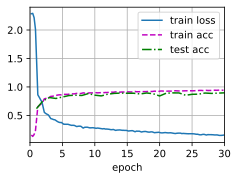

In [5]:
lr, num_epochs = 0.3, 30
net = net_fn()
trainer = torch.optim.SGD(net.parameters(), lr=lr)
train(net, train_iter, test_iter, num_epochs, loss, trainer, device)

Schedulers

Manually adjust at the end of each epoch

In [6]:
lr = 0.1
trainer.param_groups[0]["lr"] = lr
print(f'learning rate is now {trainer.param_groups[0]["lr"]:.2f}')

learning rate is now 0.10


In [7]:
class SquareRootScheduler:
    def __init__(self, lr=0.1):
        self.lr = lr

    def __call__(self, num_update):
        return self.lr * pow(num_update + 1.0, -0.5)

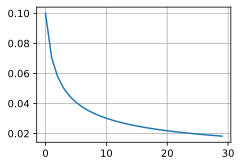

In [8]:
scheduler = SquareRootScheduler(lr=0.1)
d2l.plot(torch.arange(num_epochs), [scheduler(t) for t in range(num_epochs)])

train loss 0.270, train acc 0.902, test acc 0.879


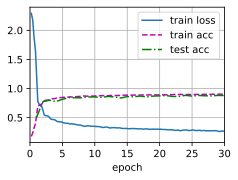

In [9]:
net = net_fn()
trainer = torch.optim.SGD(net.parameters(), lr)
train(net, train_iter, test_iter, num_epochs, loss, trainer, device,
      scheduler)

Policies

Factor scheduler

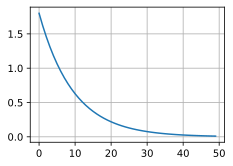

In [10]:
class FactorScheduler:
    def __init__(self, factor=1, stop_factor_lr=1e-7, base_lr=0.1):
        self.factor = factor
        self.stop_factor_lr = stop_factor_lr
        self.base_lr = base_lr

    def __call__(self, num_update):
        self.base_lr = max(self.stop_factor_lr, self.base_lr * self.factor)
        return self.base_lr

scheduler = FactorScheduler(factor=0.9, stop_factor_lr=1e-2, base_lr=2.0)
d2l.plot(torch.arange(50), [scheduler(t) for t in range(50)])

Multi factor scheduler

Keep the learning rate piecewise constant and to decrease it by a given amount every so often.

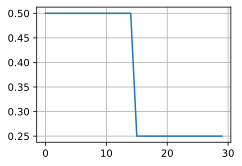

In [11]:
net = net_fn()
trainer = torch.optim.SGD(net.parameters(), lr=0.5)
scheduler = lr_scheduler.MultiStepLR(trainer, milestones=[15, 30], gamma=0.5)

def get_lr(trainer, scheduler):
    lr = scheduler.get_last_lr()[0]
    trainer.step()
    scheduler.step()
    return lr

d2l.plot(torch.arange(num_epochs), [get_lr(trainer, scheduler)
                                  for t in range(num_epochs)])

train loss 0.182, train acc 0.932, test acc 0.879


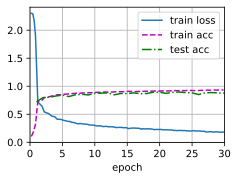

In [12]:
train(net, train_iter, test_iter, num_epochs, loss, trainer, device,
      scheduler)

Cosine scheduler

Not decrease so drastically at the beginning.

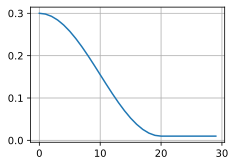

In [13]:
class CosineScheduler:
    def __init__(self, max_update, base_lr=0.01, final_lr=0,
               warmup_steps=0, warmup_begin_lr=0):
        self.base_lr_orig = base_lr
        self.max_update = max_update
        self.final_lr = final_lr
        self.warmup_steps = warmup_steps
        self.warmup_begin_lr = warmup_begin_lr
        self.max_steps = self.max_update - self.warmup_steps

    def get_warmup_lr(self, epoch):
        increase = (self.base_lr_orig - self.warmup_begin_lr) \
                       * float(epoch) / float(self.warmup_steps)
        return self.warmup_begin_lr + increase

    def __call__(self, epoch):
        if epoch < self.warmup_steps:
            return self.get_warmup_lr(epoch)
        if epoch <= self.max_update:
            self.base_lr = self.final_lr + (
                self.base_lr_orig - self.final_lr) * (1 + math.cos(
                math.pi * (epoch - self.warmup_steps) / self.max_steps)) / 2
        return self.base_lr

scheduler = CosineScheduler(max_update=20, base_lr=0.3, final_lr=0.01)
d2l.plot(torch.arange(num_epochs), [scheduler(t) for t in range(num_epochs)])

train loss 0.284, train acc 0.894, test acc 0.869


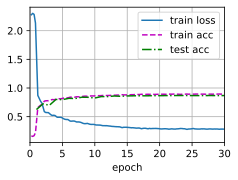

In [14]:
net = net_fn()
trainer = torch.optim.SGD(net.parameters(), lr=0.3)
train(net, train_iter, test_iter, num_epochs, loss, trainer, device,
      scheduler)

Warmup

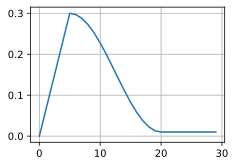

In [15]:
scheduler = CosineScheduler(20, warmup_steps=5, base_lr=0.3, final_lr=0.01)
d2l.plot(torch.arange(num_epochs), [scheduler(t) for t in range(num_epochs)])

train loss 0.186, train acc 0.931, test acc 0.899


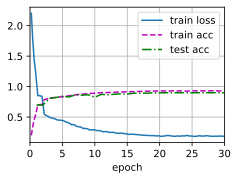

In [16]:
net = net_fn()
trainer = torch.optim.SGD(net.parameters(), lr=0.3)
train(net, train_iter, test_iter, num_epochs, loss, trainer, device,
      scheduler)

**Summary:**
- Decreasing the learning rate during training can lead to improved accuracy and (most perplexingly) reduced overfitting of the model
- A piecewise decrease of the learning rate whenever progress has plateaued is effective in practice. Essentially this ensures that we converge efficiently to a suitable solution and only then reduce the inherent variance of the parameters by reducing the learning rate.
- Cosine schedulers are popular for some CV problems
- A warmup period before optimization can prevent divergence
- Optimization serves multiple purposes in deep learning. Besides minimizing the training objective, different choices of optimization algorithms and learning rate scheduling can lead to rather different amounts of generalization and overfitting on the test set (for the same amount of training error)